(Work in progress)

To do:
1. Refactors
2. Statistics tables (mean, mode, median, st.d., etc.)
3. Explanations, conjectures, and conclusions on data/distributions
4. Additional plots?

# Initialization

In [1]:
# Navigate to root dir to import custom module "const.py"
import sys
import os
os.chdir("../")
sys.path.append(os.getcwd())
# # #
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
import const as const


In [2]:
dfs_precip_counties = []
dfs_temp_counties = []

for county in const.county_list:
  # Maintain data frame arrays, each corresponding to a county in Oregon
  dfs_precip_counties.append(pd.read_csv("./data/Precipitation_By_County/{}_Prec.csv".format(county), sep = ',', header = 0))
  dfs_temp_counties.append(pd.read_csv("./data/Temperature_By_County/{}_Temp.csv".format(county), sep = ',', header = 0))

df_wildfire = pd.read_csv("./data/Oregon_Fire_Record.csv", sep = ',', header = 0)

# Precipitation Data

In [3]:
dict_precip_month = {}

for i in range(1, 13):
  # Query dataset for rows matching the i'th month and retrieve the precipitation data
  # Collate within a matrix, flatten into a 1-D array, and add to the dictionary
  precip_month = np.matrix([df.query("Month == {}".format(i))["Precipitation"].to_numpy() for df in dfs_precip_counties])
  dict_precip_month[i] = np.ndarray.flatten(precip_month).tolist()[0]

## Histogram

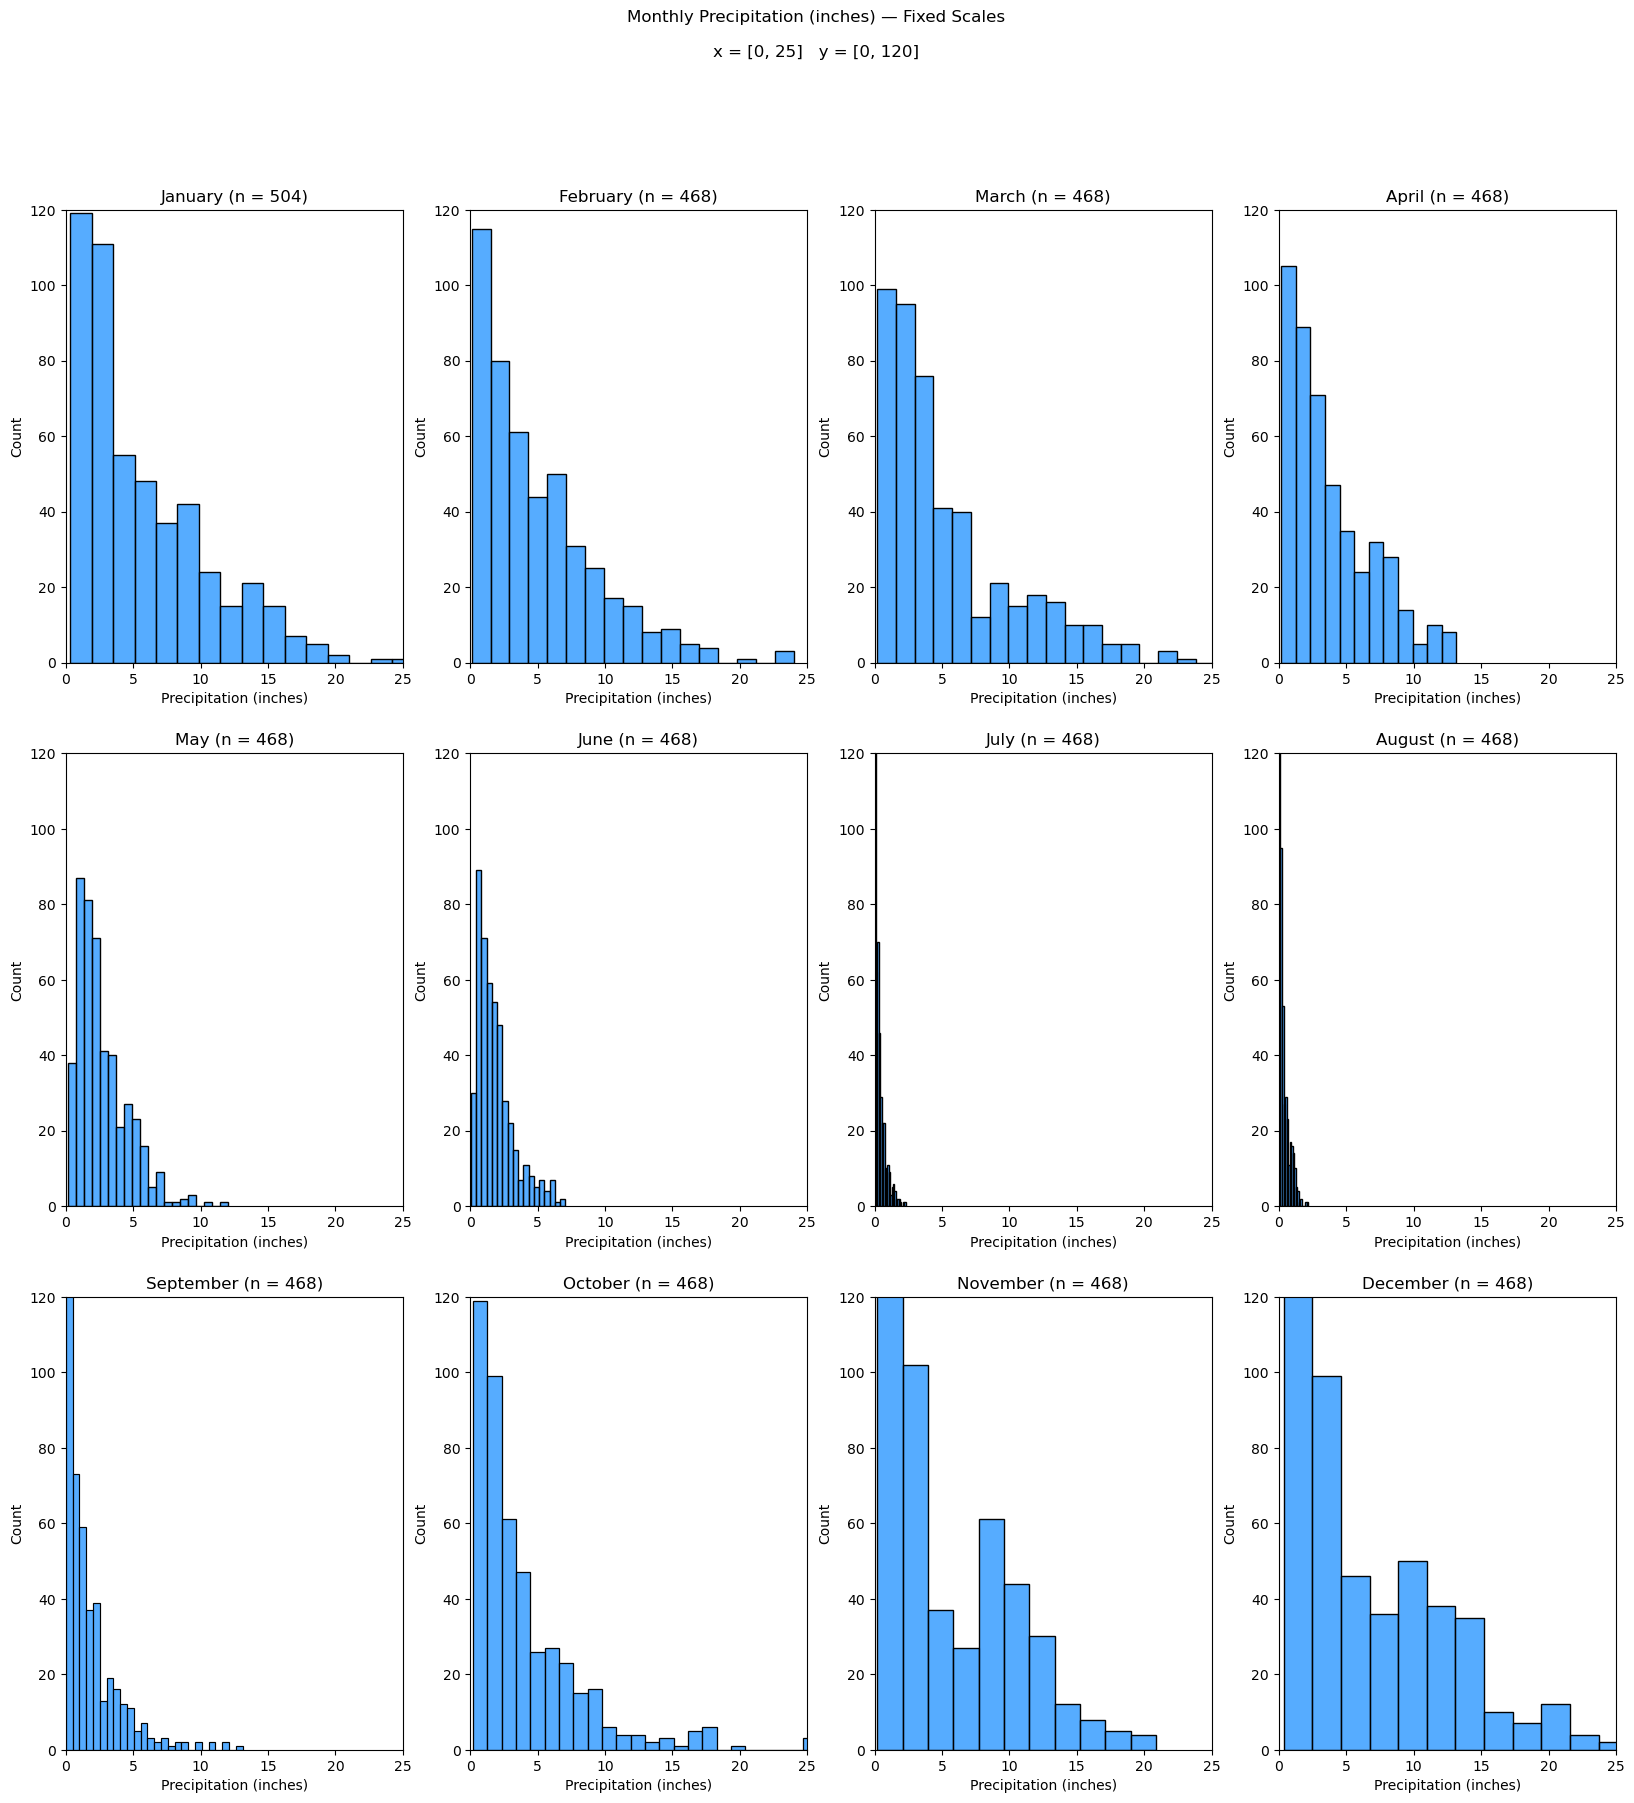

In [4]:
# Create master plot with subplots for each month of the year
plot_months_hist, ax_hist = plot.subplots(3, 4, figsize = (20, 20))
plot_months_hist.suptitle("Monthly Precipitation (inches) — Fixed Scales\n\nx = [0, 25]   y = [0, 120]")

j = k = 0
for i in range(1, 13):
  sns.histplot(ax = ax_hist[j][k], x = dict_precip_month[i], color = "dodgerblue")
  ax_hist[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_precip_month[i])))
  ax_hist[j][k].set_xlabel("Precipitation (inches)")
  ax_hist[j][k].set_xlim(0, 25)
  ax_hist[j][k].set_ylim(0, 120)

  k = i % 4
  j += 1 if k == 0 else 0

## Boxplot

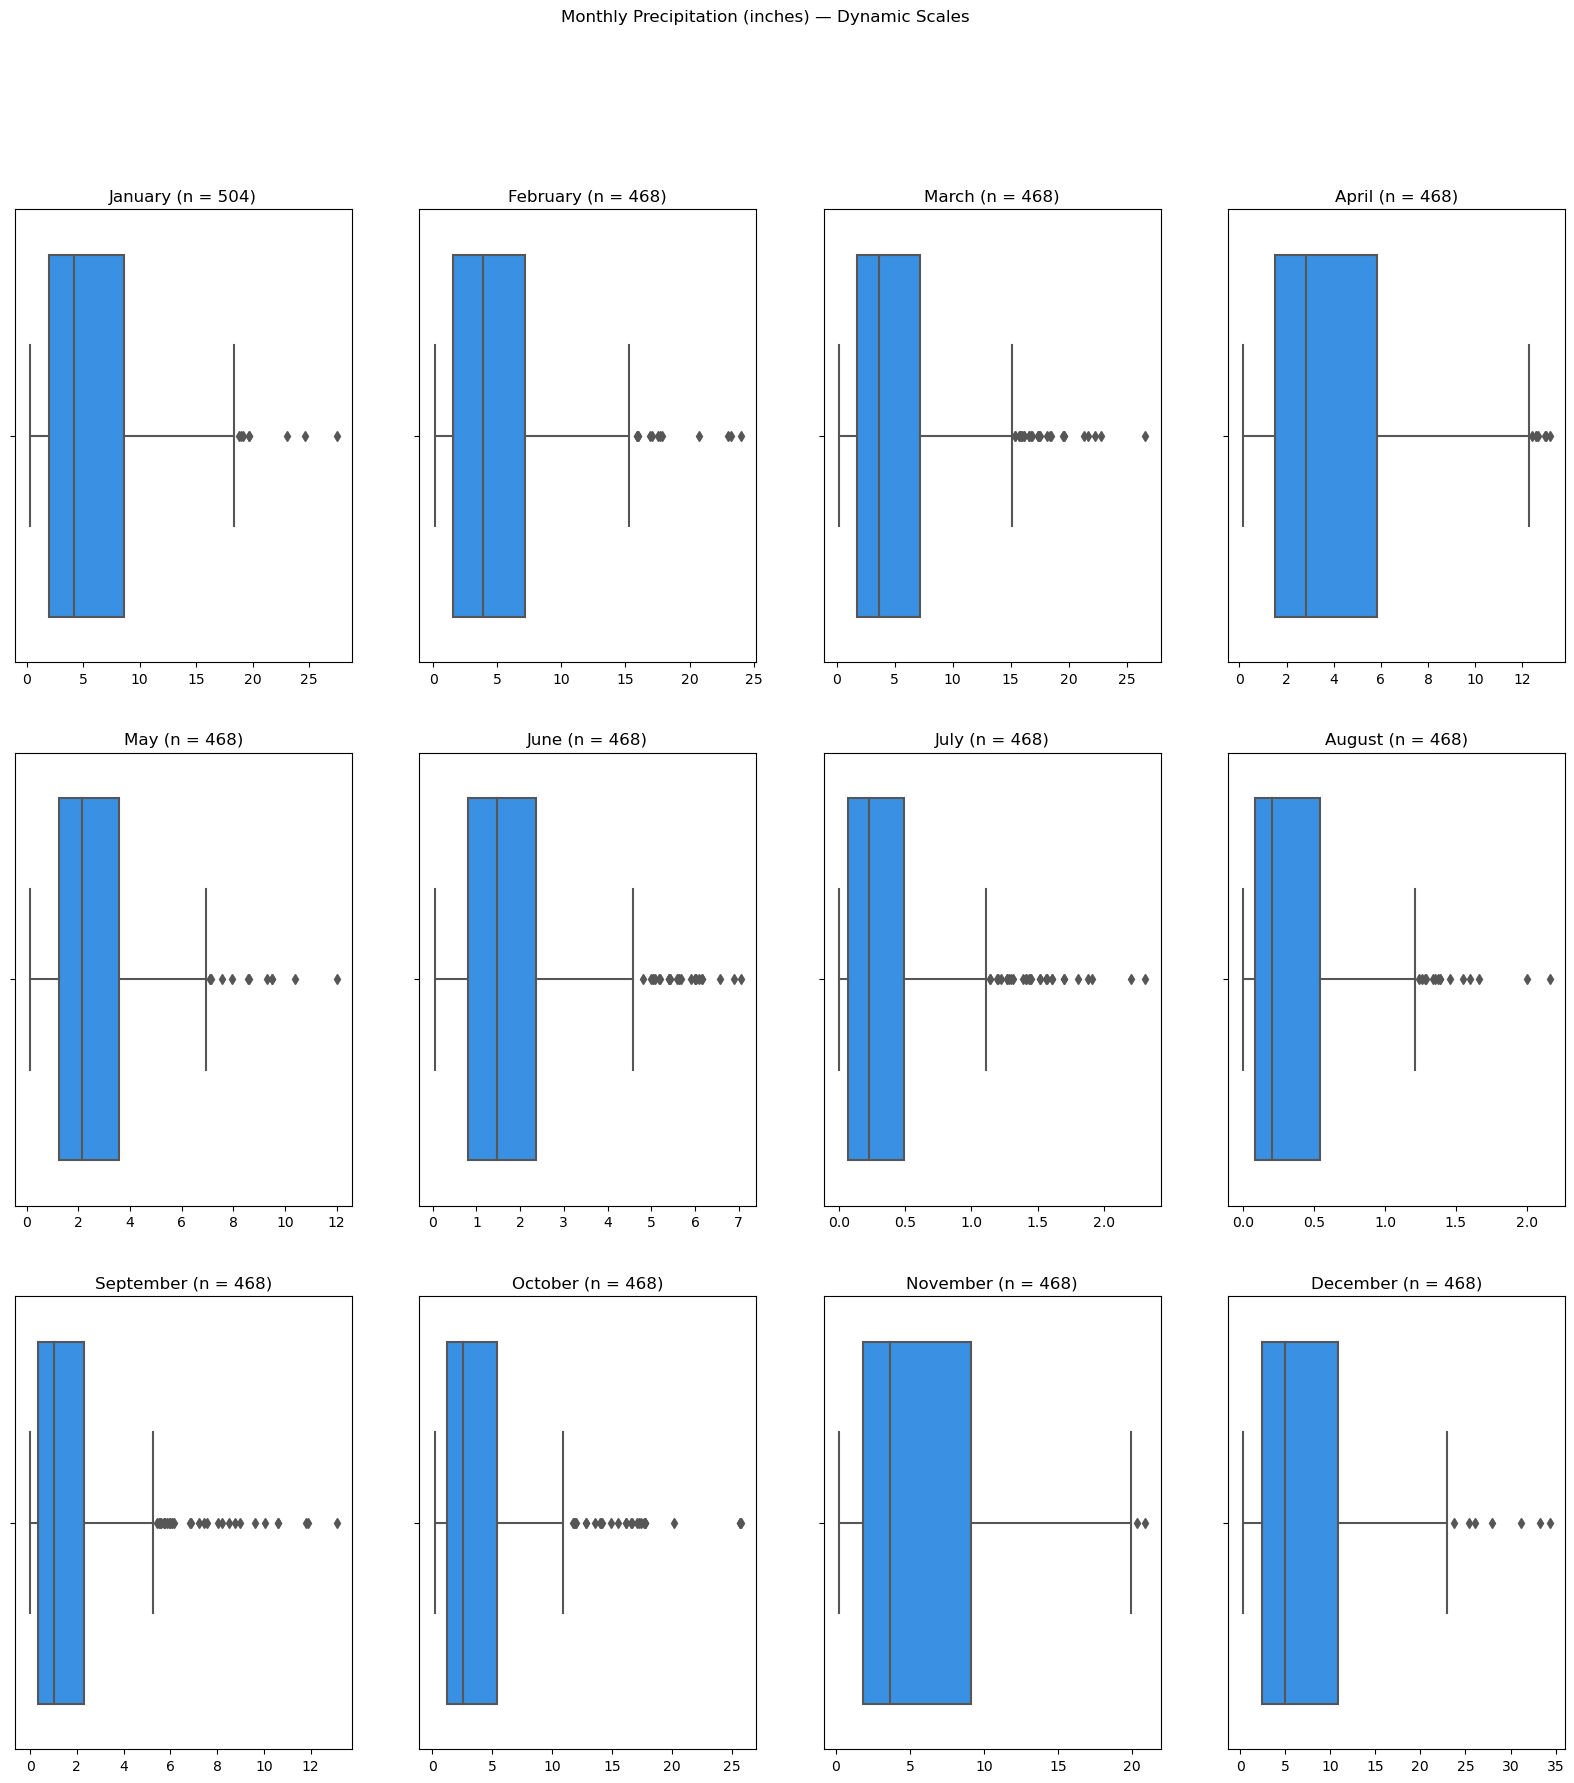

In [5]:
# Create master plot with subplots for each month of the year
plot_months_boxplot, ax_boxplot = plot.subplots(3, 4, figsize = (20, 20))
plot_months_boxplot.suptitle("Monthly Precipitation (inches) — Dynamic Scales")

j = k = 0
for i in range(1, 13):
  sns.boxplot(ax = ax_boxplot[j][k], x = dict_precip_month[i], color = "dodgerblue")
  ax_boxplot[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_precip_month[i])))
  ax_hist[j][k].set_xlabel("Precipitation (inches)")

  k = i % 4
  j += 1 if k == 0 else 0

# Temperature Data

In [6]:
dict_temp_month = {}

for i in range(1, 13):
  # Query dataset for rows matching the i'th month and retrieve the precipitation data
  # Collate within a matrix, flatten into a 1-D array, and add to the dictionary
  temp_month = np.matrix([df.query("Month == {}".format(i))["Temperature"].to_numpy() for df in dfs_temp_counties])
  dict_temp_month[i] = np.ndarray.flatten(temp_month).tolist()[0]

## Histogram

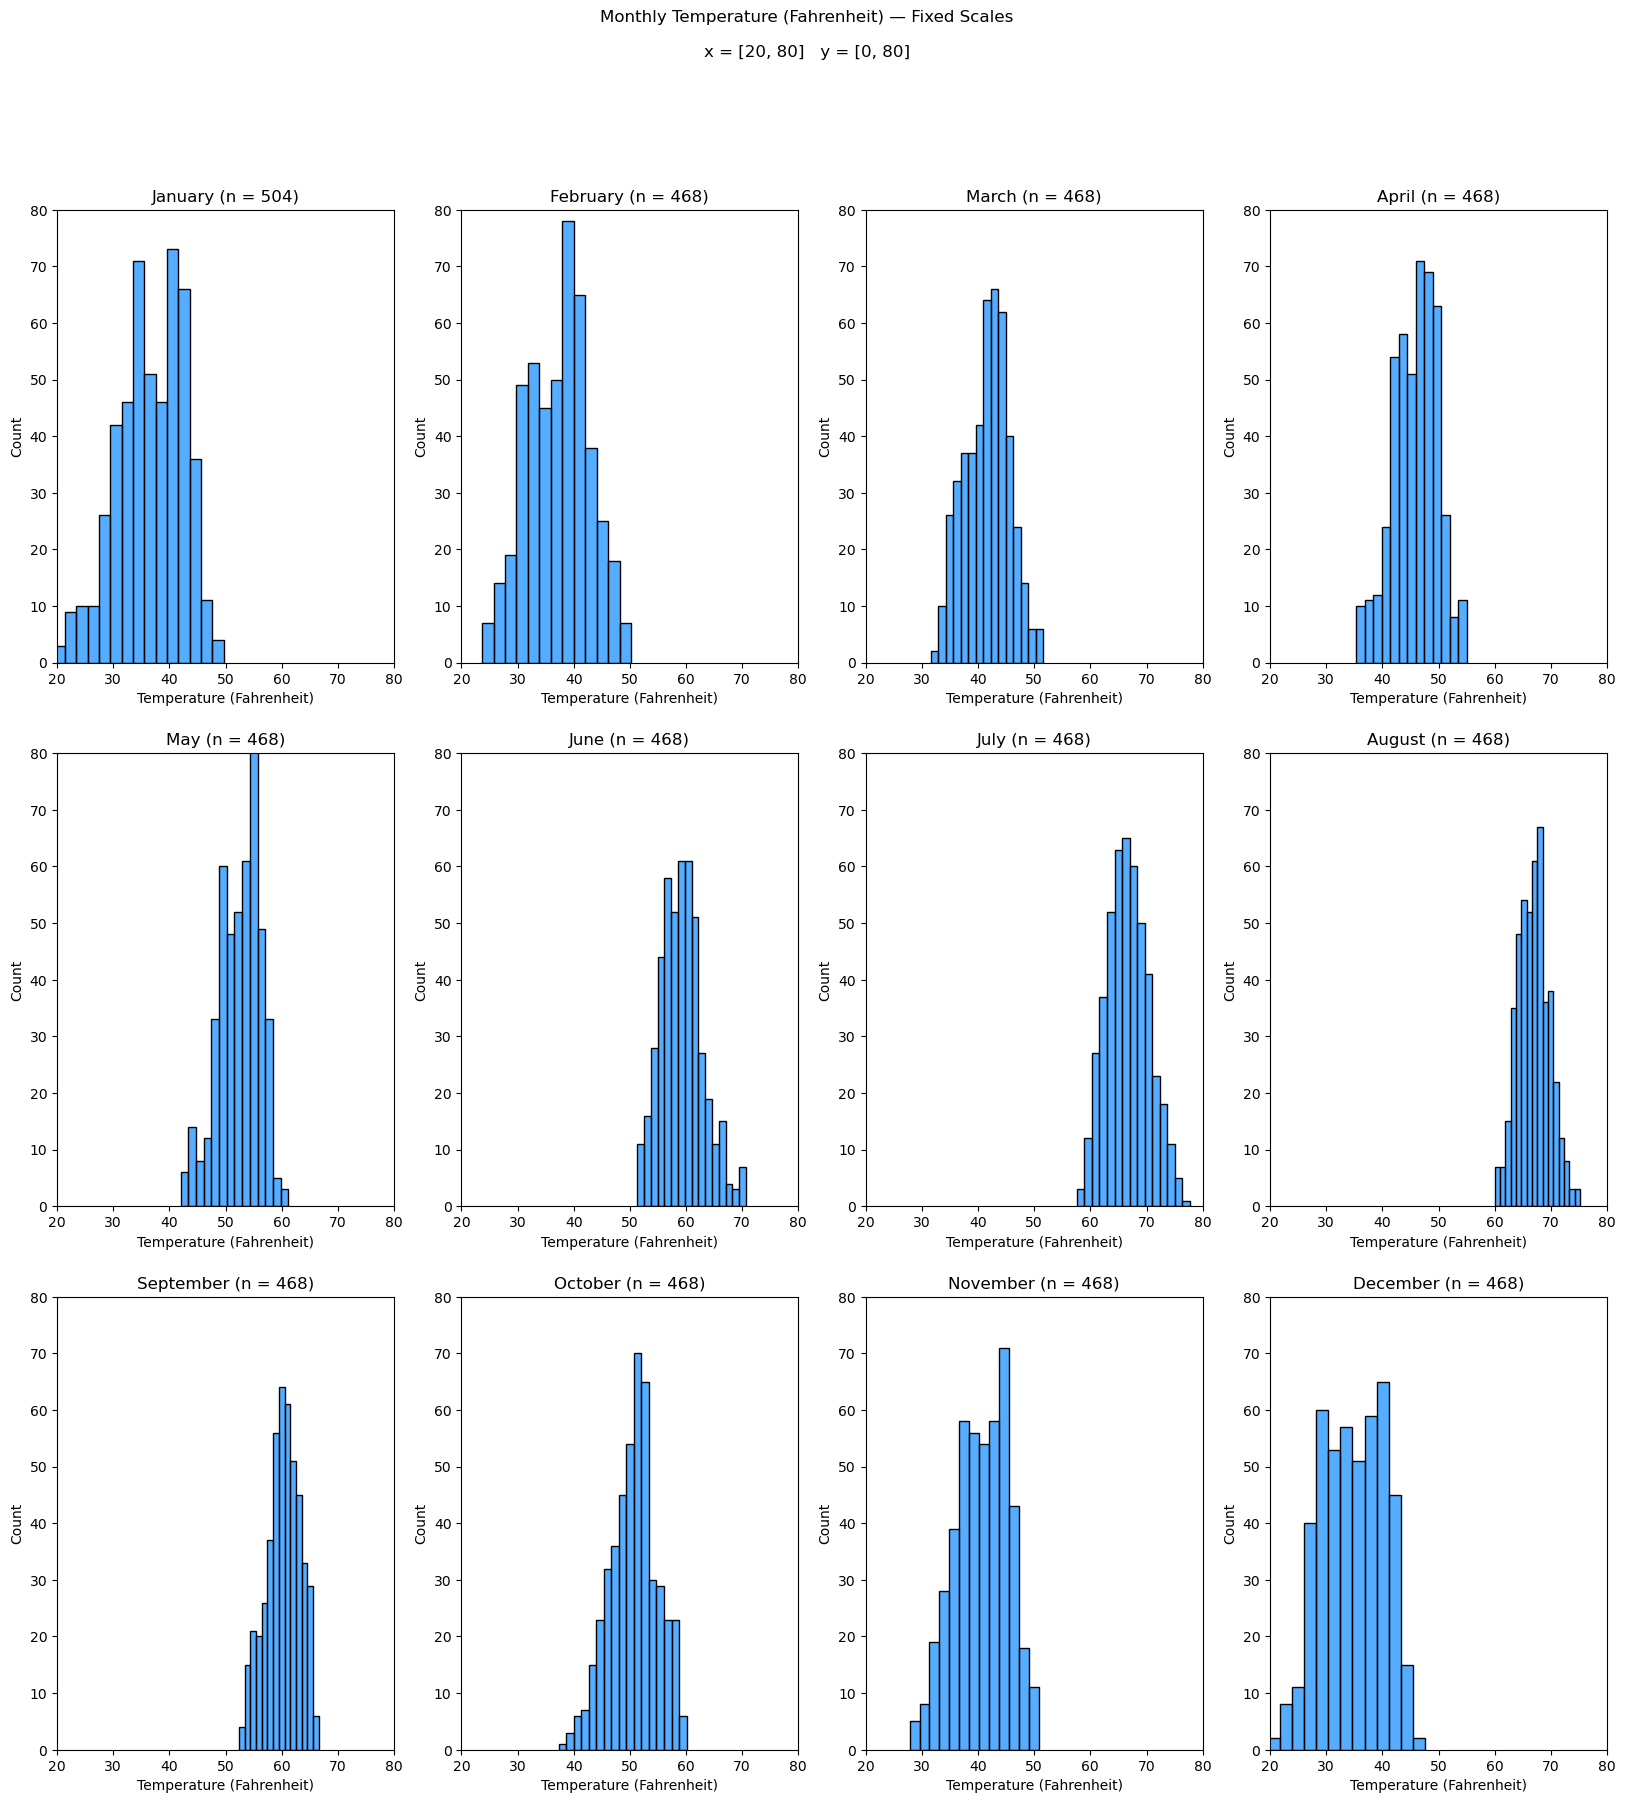

In [7]:
# Create master plot with subplots for each month of the year
plot_months_hist, ax_hist = plot.subplots(3, 4, figsize = (20, 20))
plot_months_hist.suptitle("Monthly Temperature (Fahrenheit) — Fixed Scales\n\nx = [20, 80]   y = [0, 80]")

j = k = 0
for i in range(1, 13):
  sns.histplot(ax = ax_hist[j][k], x = dict_temp_month[i], color = "dodgerblue")
  ax_hist[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_temp_month[i])))
  ax_hist[j][k].set_xlabel("Temperature (Fahrenheit)")
  ax_hist[j][k].set_xlim(20, 80)
  ax_hist[j][k].set_ylim(0, 80)

  k = i % 4
  j += 1 if k == 0 else 0

## Boxplot

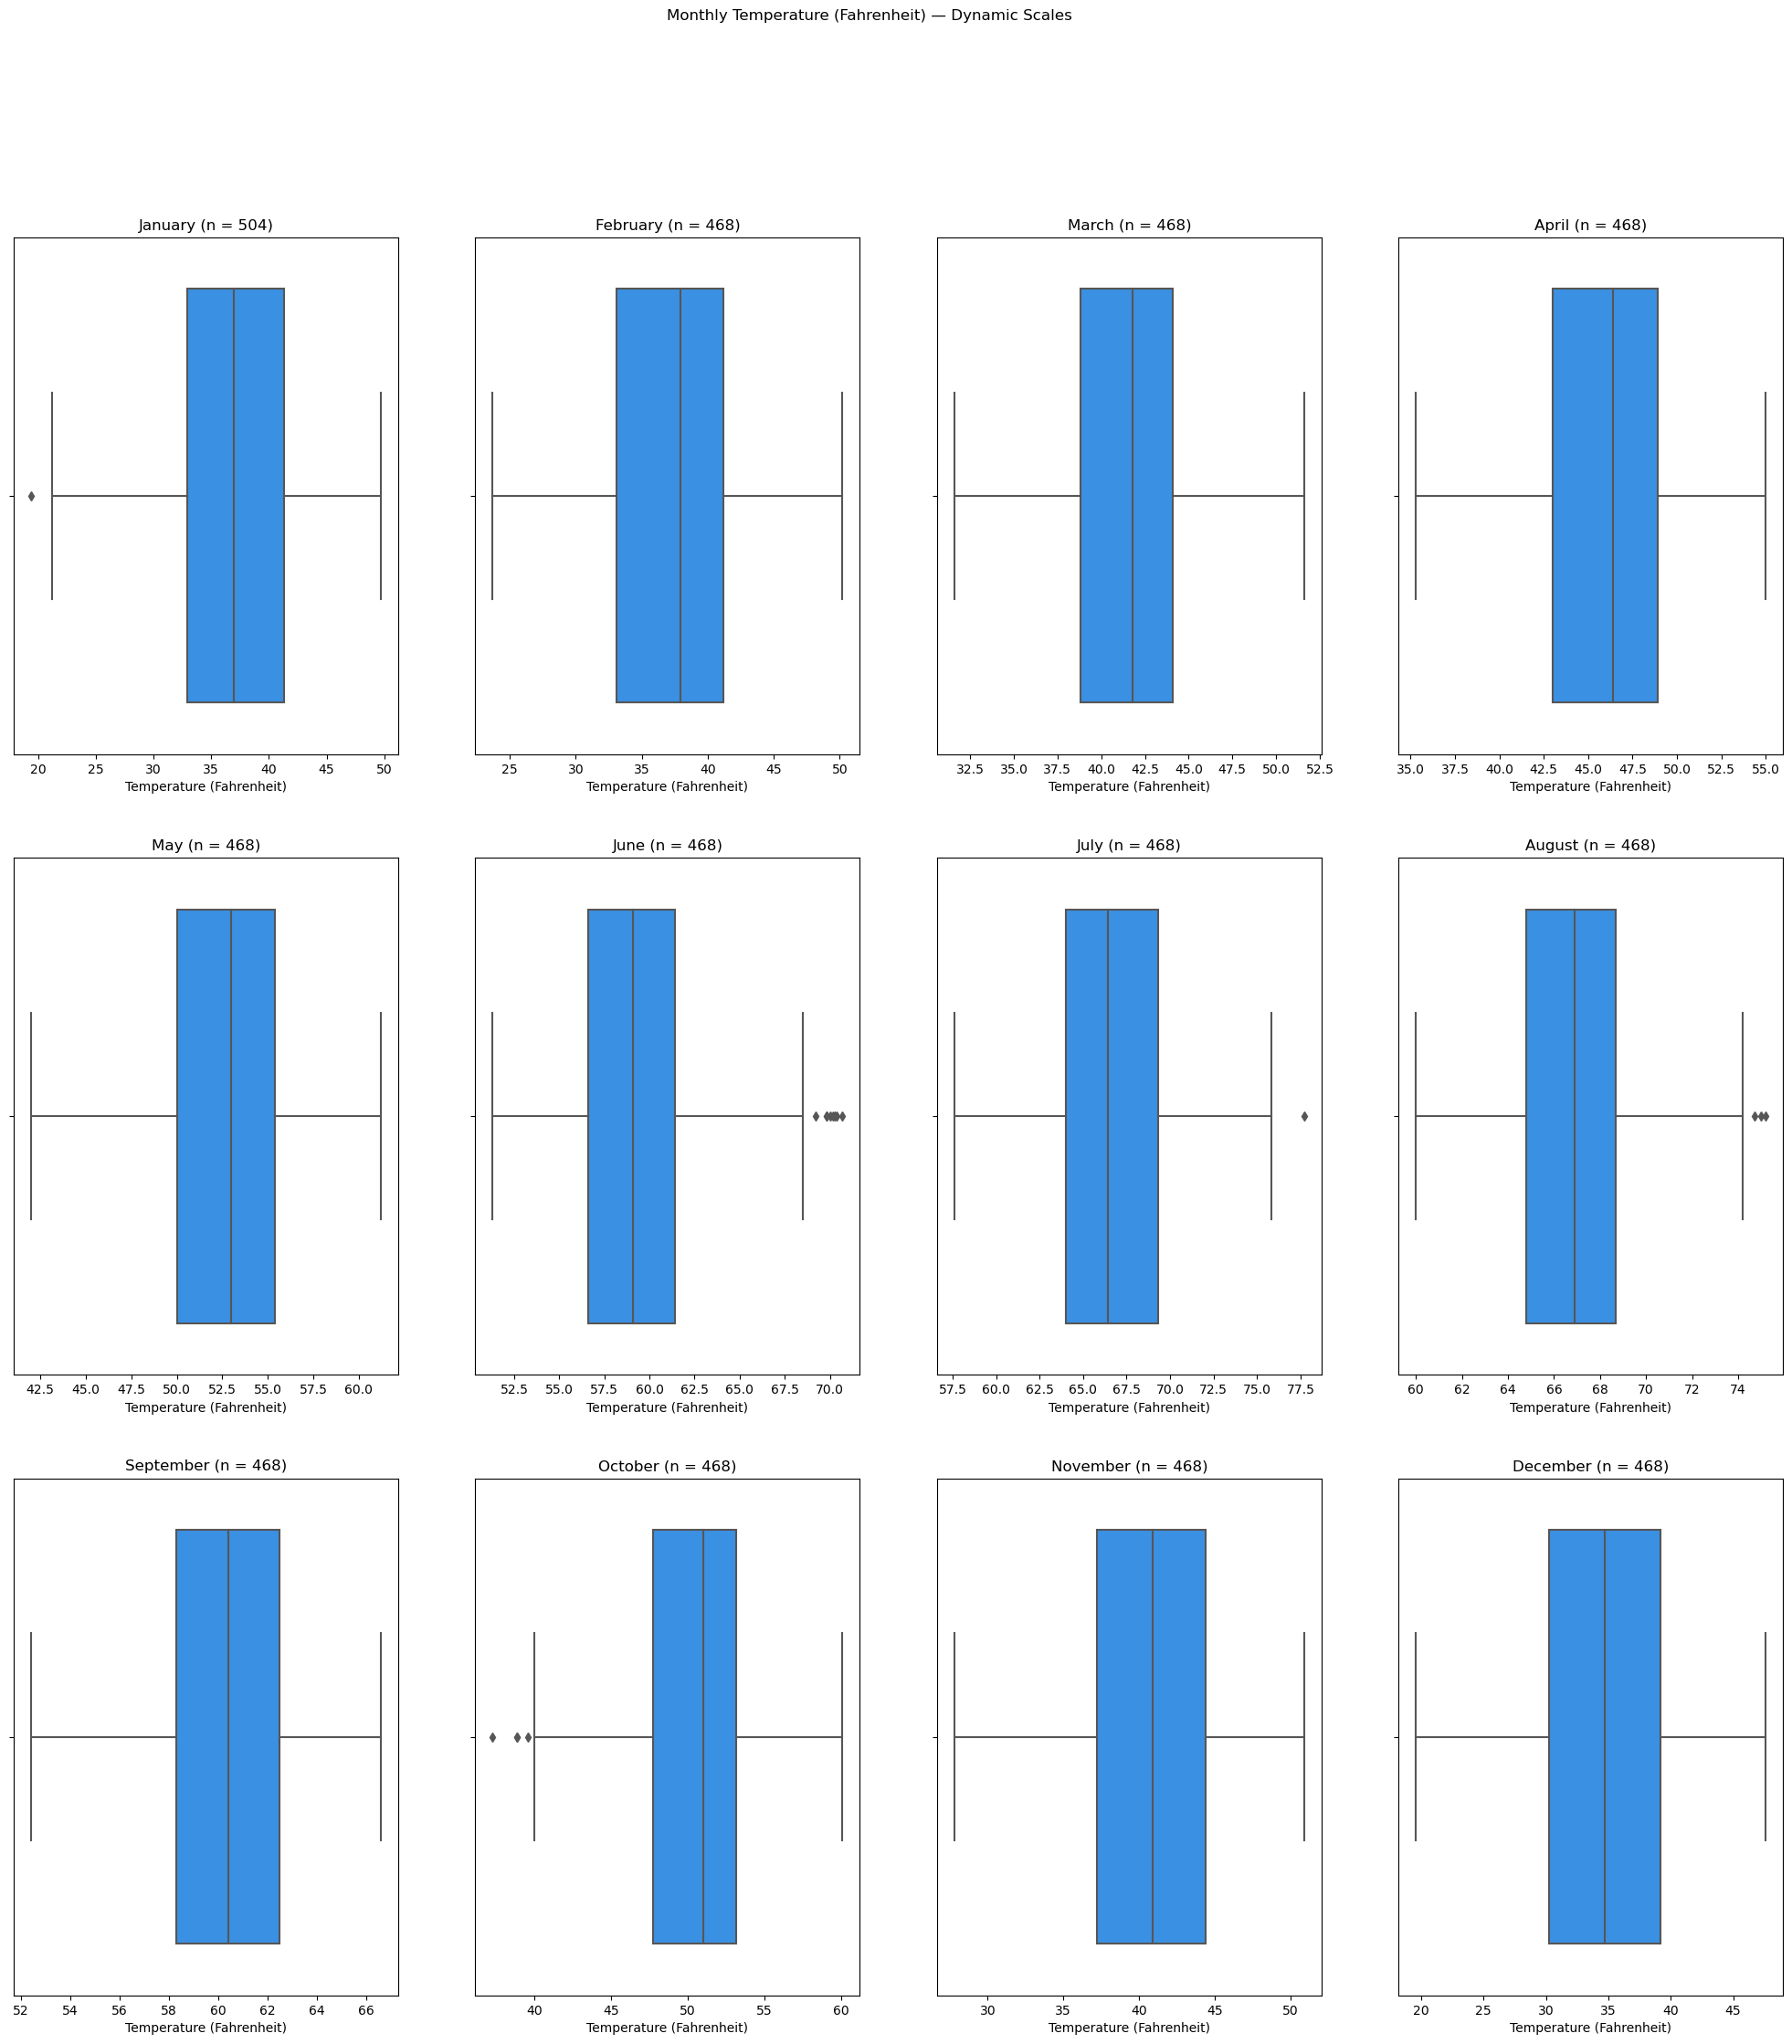

In [8]:
# Create master plot with subplots for each month of the year
plot_months_boxplot, ax_boxplot = plot.subplots(3, 4, figsize = (25, 25))
plot_months_boxplot.suptitle("Monthly Temperature (Fahrenheit) — Dynamic Scales")

j = k = 0
for i in range(1, 13):
  sns.boxplot(ax = ax_boxplot[j][k], x = dict_temp_month[i], color = "dodgerblue")
  ax_boxplot[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_temp_month[i])))
  ax_boxplot[j][k].set_xlabel("Temperature (Fahrenheit)")

  k = i % 4
  j += 1 if k == 0 else 0

# Wildfire Occurrence

[Placeholder]

## Histogram

Text(0.5, 1.0, 'Wildfire Occurrence by Month (n = 15852)')

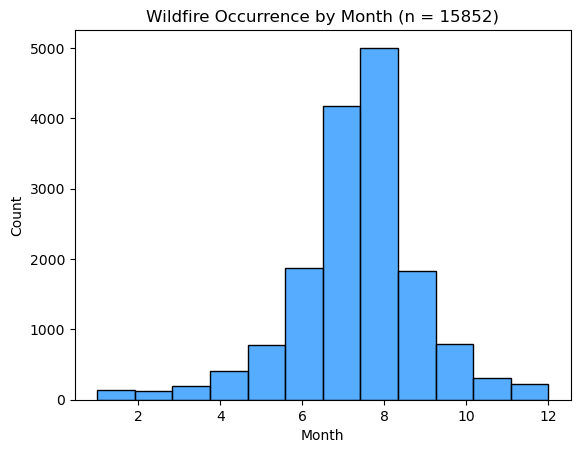

In [9]:
plot_month_hist = sns.histplot(x = df_wildfire["Month"], bins = 12, color = "dodgerblue")
plot_month_hist.set_title("Wildfire Occurrence by Month (n = {})".format(df_wildfire["Month"].count()))

## Boxplot

Text(0.5, 1.0, 'Wildfire Occurrence by Month (n = 15852)')

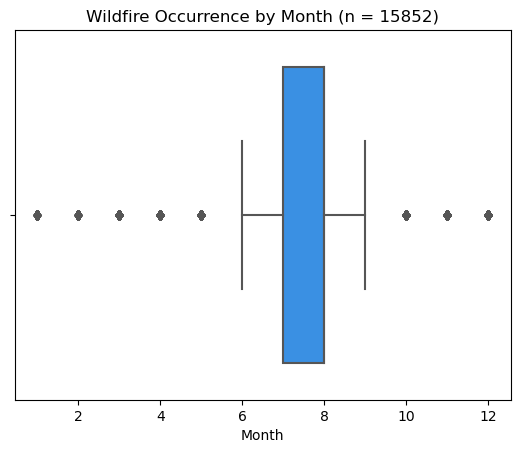

In [10]:
plot_month_boxplot = sns.boxplot(x = df_wildfire["Month"], color = "dodgerblue")
plot_month_boxplot.set_title("Wildfire Occurrence by Month (n = {})".format(df_wildfire["Month"].count()))